# Not Hotdog Classifier Using fast.ai

This is a classic Silicon Valley: Season 4 Episode 4: Not Hotdog (HBO): 
https://www.youtube.com/watch?v=pqTntG1RXSY

Blog: https://medium.com/@timanglade/how-hbos-silicon-valley-built-not-hotdog-with-mobile-tensorflow-keras-react-native-ef03260747f3

The original code reference that I slightly modified: https://github.com/pvhee/fastai-hotdog/blob/master/notebooks/hotdog.ipynb

Dataset downloaded from "https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/downloads/hot-dog-not-hot-dog.zip"

### Just experimenting with my new EVGA RTX 2080 Ti XC Gaming GPU

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import zipfile

## Run in specific GPU

In [3]:
# Update the GPU to run or delete this cell completely.
# I'm testing my new EVGA 2080 Ti XC Gaming gpu :)
import torch

for i in range(torch.cuda.device_count()):
    print(f"GPU NO. {i}\tNAME: {torch.cuda.get_device_name(i)}")

torch.cuda.set_device(0) 

GPU NO. 0	NAME: GeForce RTX 2080 Ti
GPU NO. 1	NAME: GeForce GTX 1060 6GB


## Prepare the data

In [4]:
dataset = "hot-dog-not-hot-dog.zip"
data_path = Path("data-images/")
data_path

PosixPath('data-images')

In [5]:
zip_ref = zipfile.ZipFile(dataset, "r")
zip_ref.extractall(data_path)
zip_ref.close()

In [6]:
np.random.seed(42)

bs = 64 # lower the batch size if your GPU has low memory or you are just using CPU. This network uses ResNet50
data = (ImageDataBunch
         .from_folder(data_path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs)
         .normalize(imagenet_stats))

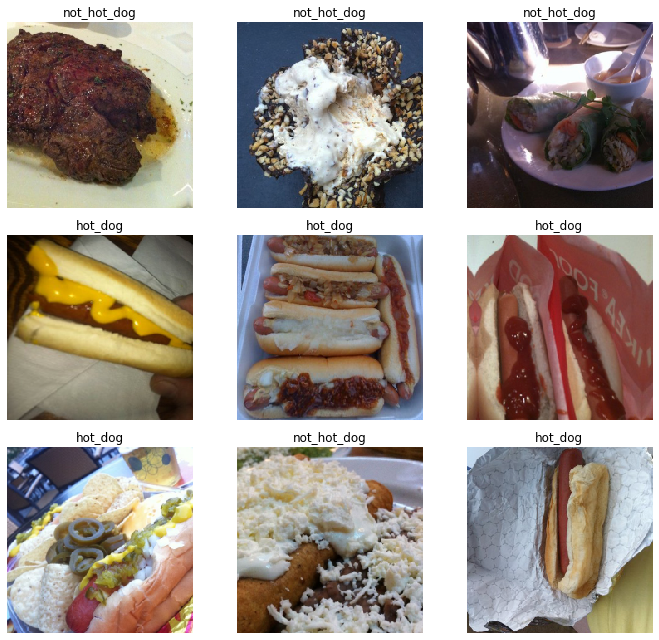

In [7]:
data.show_batch(rows=3, figsize=(10,9))

In [8]:
data.classes, data.c, data

(['hot_dog', 'not_hot_dog'], 2, ImageDataBunch;
 
 Train: LabelList (1597 items)
 x: ImageList
 Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
 y: CategoryList
 not_hot_dog,not_hot_dog,not_hot_dog,not_hot_dog,not_hot_dog
 Path: data-images;
 
 Valid: LabelList (399 items)
 x: ImageList
 Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
 y: CategoryList
 hot_dog,not_hot_dog,hot_dog,hot_dog,hot_dog
 Path: data-images;
 
 Test: None)


## SOURCE CODE FOR TORCHVISION.MODELS.RESNET

See: https://pytorch.org/docs/stable/_modules/torchvision/models/resnet.html

This sample uses the resnet50 model. If your gpu or you are using a cpu to train, you can use resnet34, resnet18 or lower.

Good read about ResNet: https://towardsdatascience.com/introduction-to-resnets-c0a830a288a4

## Now train em....

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [10]:
learn.fit_one_cycle(5) # Experimented 5 epochs which resulted with high accuracy. Just preventing overfitting.

epoch,train_loss,valid_loss,accuracy,time
0,0.588014,0.448769,0.902256,00:09
1,0.425513,0.203998,0.944862,00:07
2,0.300958,0.086315,0.972431,00:07
3,0.210306,0.074175,0.969925,00:07
4,0.162175,0.055461,0.977444,00:07


In [11]:
learn.save("hotdog-stage-1") # saving the weights
learn.load("hotdog-stage-1");

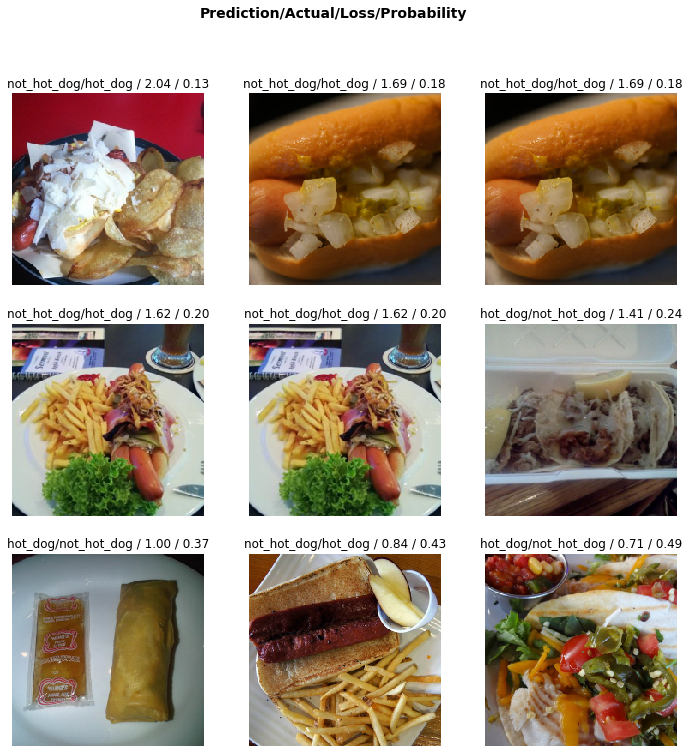

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(12,12), heatmap=False) # Some imperfections in prediction :)

## Let's predict some HOTDOGs!!!

### Prediction No. 1: Hotdog

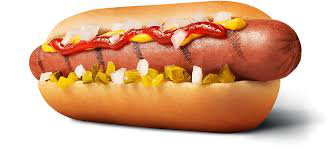

In [13]:
hotdog1 = open_image("./predict-images/hotdog_1.jpeg")
hotdog1

In [14]:
pred_class, pred_idx, outputs = learn.predict(hotdog1)
pred_class, pred_idx, outputs

(Category hot_dog, tensor(0), tensor([1.0000e+00, 1.2579e-08]))

### Prediction No. 2: Not Hotdog

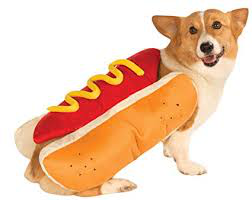

In [15]:
not_hotdog1 = open_image("./predict-images/not_hotdog_1.jpeg")
not_hotdog1

In [16]:
pred_class, pred_idx, outputs = learn.predict(not_hotdog1)
pred_class, pred_idx, outputs

(Category not_hot_dog, tensor(1), tensor([0.3231, 0.6769]))

### Prediction No. 3: Hotdog

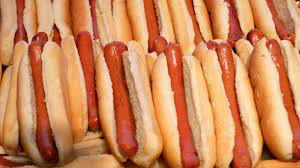

In [17]:
hotdog2 = open_image("./predict-images/hotdog_2.jpeg")
hotdog2

In [18]:
learn.predict(hotdog2)

(Category hot_dog, tensor(0), tensor([0.9972, 0.0028]))

### Prediction No. 4: Not Hotdog

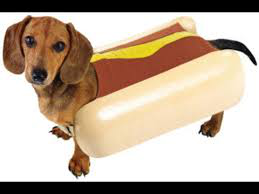

In [19]:
not_hotdog2 = open_image("./predict-images/not_hotdog_2.jpeg")
not_hotdog2

In [20]:
learn.predict(not_hotdog2)

(Category not_hot_dog, tensor(1), tensor([0.0363, 0.9637]))